<a href="https://colab.research.google.com/github/HoussemDs/satellite_segmentation/blob/main/app_satelitie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y numpy scikit-learn opencv-python patchify


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86
Found existing installation: patchify 0.2.3
Uninstalling patchify-0.2.3:
  Successfully uninstalled patchify-0.2.3


In [2]:
!pip install scikit-learn

!pip install numpy==1.26.4


  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires opencv-python>=3.4.8.29, which is not installed.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17

In [3]:
!pip install opencv-python patchify


  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached patchify-0.2.3-py3-none-any.whl.metadata (3.0 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)


In [4]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from patchify import patchify
from matplotlib import pyplot as plt
import random

In [5]:
minmaxscaler = MinMaxScaler()


In [6]:
!ls -lah '/content/drive/MyDrive/data/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Apr  2 11:13  classes.json
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 1'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 2'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 3'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 4'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 5'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 6'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 7'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 8'


In [7]:
dataset_root_folder = '/content/drive/MyDrive/data'

In [8]:
dataset_name = 'Semantic segmentation dataset'

In [9]:
for path , subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name =='masks': #images ken bech n5dem 3la el data
        images = os.listdir(path)
        print(images)
        for i , image_name in enumerate(images):
            if (image_name.endswith('.png')): # twali jpg
                #print(image_name)
                a=True

['image_part_008.png', 'image_part_003.png', 'image_part_001.png', 'image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_009.png', 'image_part_006.png', 'image_part_002.png']
['image_part_002.png', 'image_part_004.png', 'image_part_001.png', 'image_part_008 (1).png', 'image_part_009 (1).png', 'image_part_008.png', 'image_part_006 (1).png', 'image_part_005 (1).png', 'image_part_009.png', 'image_part_007 (1).png', 'image_part_003.png', 'image_part_007.png', 'image_part_006.png', 'image_part_005.png']
['image_part_004.png', 'image_part_001.png', 'image_part_002.png', 'image_part_006.png', 'image_part_003.png', 'image_part_007.png', 'image_part_005.png', 'image_part_009.png', 'image_part_008.png']
['image_part_006.png', 'image_part_007.png', 'image_part_009.png', 'image_part_002.png', 'image_part_003.png', 'image_part_008.png', 'image_part_005.png', 'image_part_001.png', 'image_part_004.png']
['image_part_009.png', 'image_part_006.png', 'image_part_003.png', 'image_

behi we have the dataset here and everything okay

In [10]:
image_patch_size = 256

In [11]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg')

In [12]:
image.shape

(544, 509, 3)

In [13]:
print(type(image))

<class 'numpy.ndarray'>


In [14]:
image_patches = patchify(image,(image_patch_size, image_patch_size, 3), step= image_patch_size)
len(image_patches)

2

In [15]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [16]:
print('x', image_x.shape)
print('y', image_y[0].shape)

x (1, 256, 256, 3)
y (256, 256, 3)


In [17]:
type(Image.fromarray(image))

PIL.Image.Image

In [18]:
image.shape

(544, 509, 3)

In [19]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [20]:

image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    else:
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1, 20):
            # Load image or mask
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
            if image is not None:
                # If it's a mask, convert it to RGB (if required)
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Calculate the size of the patches
                size_x = (image.shape[0] // image_patch_size) * image_patch_size
                size_y = (image.shape[1] // image_patch_size) * image_patch_size

                # Crop the image to remove extra borders
                image = Image.fromarray(image)
                image = image.crop((0, 0, size_y, size_x))
                image = np.array(image)

                # Patchify the image into smaller patches
                patchify_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                # Loop through patches and process them
                for i in range(patchify_images.shape[0]):
                    for j in range(patchify_images.shape[1]):
                        indivdual_patched_array = patchify_images[i, j, :, :]

                        # For image data, normalize each patch
                        if image_type == 'images':
                            indivdual_patched_array = minmaxscaler.fit_transform(indivdual_patched_array.reshape(-1, indivdual_patched_array.shape[-1])).reshape(indivdual_patched_array.shape)
                            indivdual_patched_image = indivdual_patched_array[0]
                            image_dataset.append(indivdual_patched_image)

                        # For mask data, just add the patch without any transformation
                        elif image_type == 'masks':
                            indivdual_patched_mask = indivdual_patched_array[0]
                            mask_dataset.append(indivdual_patched_mask)

In [21]:
len(image_dataset)
len(mask_dataset)

945

In [22]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

In [23]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

234


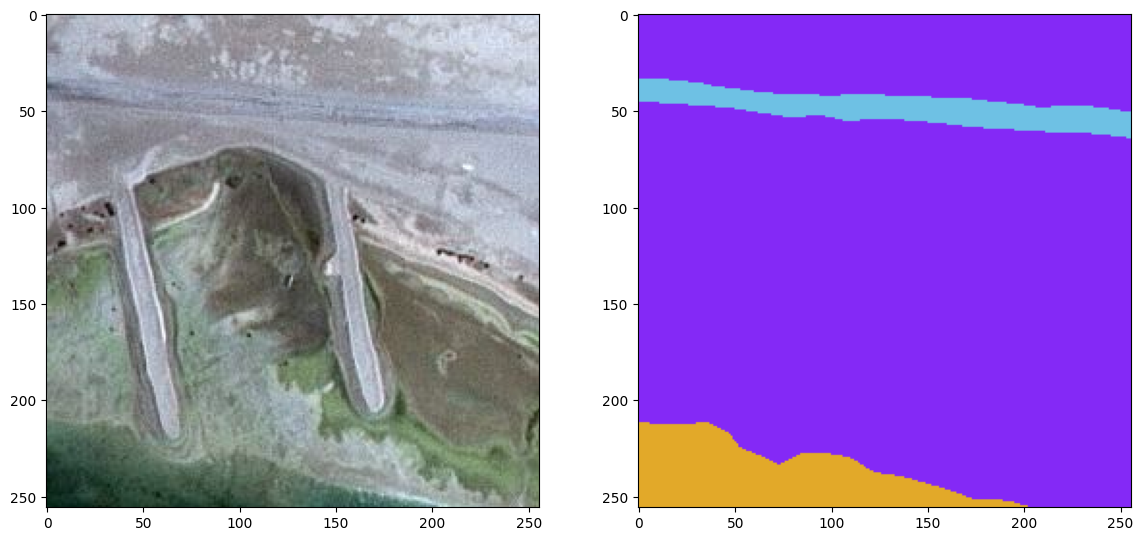

In [24]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(image_dataset[random_image_id])
plt.subplot(1,2,2)
plt.imshow(mask_dataset[random_image_id])

In [25]:
class_building = '#3C1098'
class_Land = '#8429F6'
class_Road= '#6EC1E4'
class_Vegetation='#FEDD3A'
class_Water= '#E2A929'
class_Unlabeled ='#9B9B9B'

class_building = class_building.lstrip('#')
class_Land = class_Land.lstrip('#')
class_Road = class_Road.lstrip('#')
class_Vegetation = class_Vegetation.lstrip('#')
class_Water = class_Water.lstrip('#')
class_Unlabeled = class_Unlabeled.lstrip('#')

class_building = np.array(tuple(int(class_building[i:i+2], 16)for i in (0, 2, 4)))
class_Land = np.array(tuple(int(class_Land[i:i+2], 16)for i in (0, 2, 4)))
class_Road = np.array(tuple(int(class_Road[i:i+2], 16)for i in (0, 2, 4)))
class_Vegetation = np.array(tuple(int(class_Vegetation[i:i+2], 16)for i in (0, 2, 4)))
class_Water = np.array(tuple(int(class_Water[i:i+2], 16)for i in (0, 2, 4)))
class_Unlabeled = np.array(tuple(int(class_Unlabeled[i:i+2], 16)for i in (0, 2, 4)))



In [26]:
class_building,class_Land,class_Road,class_Vegetation,class_Water,class_Unlabeled

(array([ 60,  16, 152]),
 array([132,  41, 246]),
 array([110, 193, 228]),
 array([254, 221,  58]),
 array([226, 169,  41]),
 array([155, 155, 155]))

In [27]:
mask_dataset.shape[0]

945

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [254, 221,  58],
        [254, 221,  58],
        [254, 221,  58]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [254, 221,  58],
        [254, 221,  58],
        [254, 221,  58]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [254, 221,  58],
        [254, 221,  58],
        [254, 221,  58]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]], dtype=uint8)
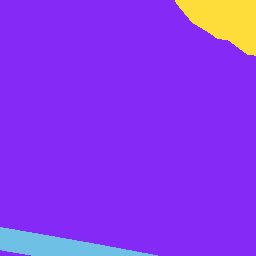

In [28]:
mask_dataset[-5]

In [29]:
label = mask_dataset[-1]

In [30]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    label_segment[np.all(label == class_Water, axis=-1)]=0
    label_segment[np.all(label == class_Land, axis=-1)]=1
    label_segment[np.all(label == class_Road, axis=-1)]=2
    label_segment[np.all(label == class_building, axis=-1)]=3
    label_segment[np.all(label == class_Vegetation, axis=-1)]=4
    label_segment[np.all(label == class_Unlabeled, axis=-1)]=5
    label_segment = label_segment[:,:,0]
    return label_segment

In [31]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)


In [32]:
labels = np.expand_dims(labels,axis=3)
labels.shape

(945, 256, 256, 1)

In [33]:
print('total unique labels on masks : ',np.unique(labels))

total unique labels on masks :  [0 1 2 3 4 5]


932


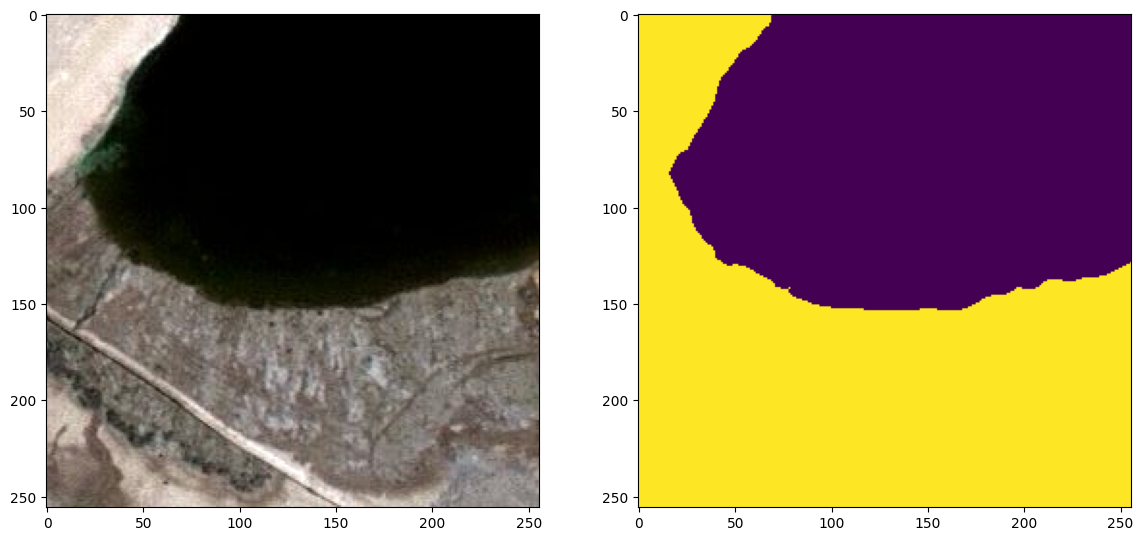

In [34]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(image_dataset[random_image_id])
plt.subplot(1,2,2)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
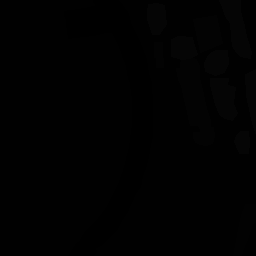

In [35]:
labels[0][:,:,0]


In [36]:
total_classes =  len(np.unique(labels))

In [37]:
total_classes

6

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
labels_categorical_dataset = to_categorical(labels,num_classes=total_classes)

In [40]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [41]:
master_training_dataset = image_dataset

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test, y_train, y_test = train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.2,random_state=42)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 256, 256, 3)
(189, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 6)


In [44]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]

In [45]:
print(image_height)
print(image_width)
print(image_channels)

756
256
256
